In [87]:
#12/8/24 For the creation of figures and other graphs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math
sys.path.insert(1, '/Users/james/Documents/Honours/Python') 
from Function_Repo import setbalance
import math

In [117]:
datasets = []
index = []
#directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
directory = '/Users/james/Documents/Honours/Data/Targets/Drugbank/datasets/'
namelist = []
toxvals = []
btoxvals = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    #if 'csv' in filename and 'ardio' in filename:
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        temp = df['Toxicity_Value'].values
        toxvals.append(temp)
        datasets.append(df)
        namelist.append(filename[:-4])
        
        baltox = setbalance(df)
        btoxvals.append(baltox['Toxicity_Value'].values)
        
poslist = []
neglist = []
totlist = []

for data in toxvals:
    pos = 0
    neg = 0
    for item in data:
        if item == 1:
            pos +=1 
        else:
            neg += 1
    totlist.append(pos + neg)
    poslist.append(pos)
    neglist.append(neg)

data = [totlist, poslist, neglist]

models = ('Sample Count', 'Toxic', 'Non-toxic')

In [119]:
loops = 0
for item in totlist:
    print(namelist[loops], ':', totlist[loops], poslist[loops], neglist[loops])
    
    loops += 1

Cardiotoxicity_Cardiotoxicity-1_DBtargets : 266 39 227
Endocrine Disruption_SR-ARE_DBtargets : 967 184 783
Cardiotoxicity_Cardiotoxicity-5_DBtargets : 266 103 163
Endocrine Disruption_SR-MMP_DBtargets : 988 158 830
Endocrine Disruption_NR-ER-LBD_DBtargets : 1207 90 1117
Carcinogenicity_Carcinogenicity_DBtargets : 192 58 134
Endocrine Disruption_SR-HSE_DBtargets : 1116 60 1056
Hepatotoxicity_Hepatotoxicity_DBtargets : 820 457 363
Endocrine Disruption_SR-ATAD5_DBtargets : 1211 49 1162
Endocrine Disruption_NR-AR_DBtargets : 1258 117 1141
Endocrine Disruption_NR-aromatase_DBtargets : 1016 76 940
Mutagenicity_Ames Mutagenicity_DBtargets : 390 91 299
Endocrine Disruption_NR-AhR_DBtargets : 1117 110 1007
Cardiotoxicity_Cardiotoxicity-30_DBtargets : 266 219 47
Endocrine Disruption_SR-p53_DBtargets : 1162 94 1068
Endocrine Disruption_NR-ER_DBtargets : 1079 180 899
Cardiotoxicity_Cardiotoxicity-10_DBtargets : 266 142 124
Endocrine Disruption_NR-AR-LBD_DBtargets : 1154 85 1069
Endocrine Disruptio

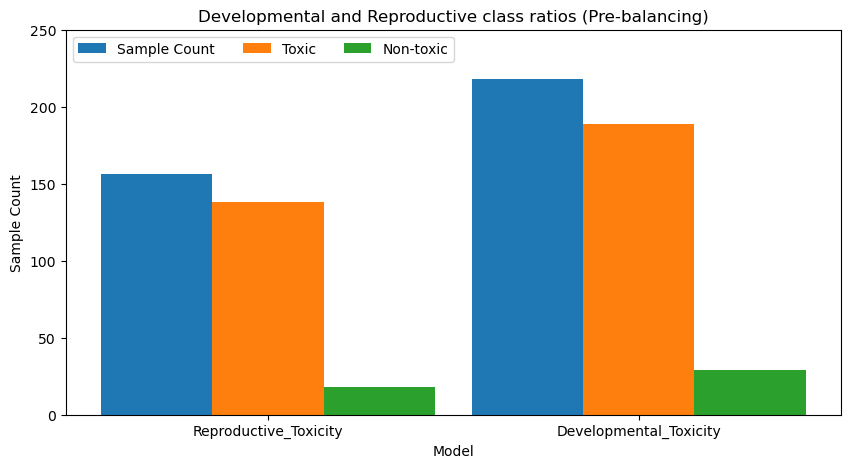

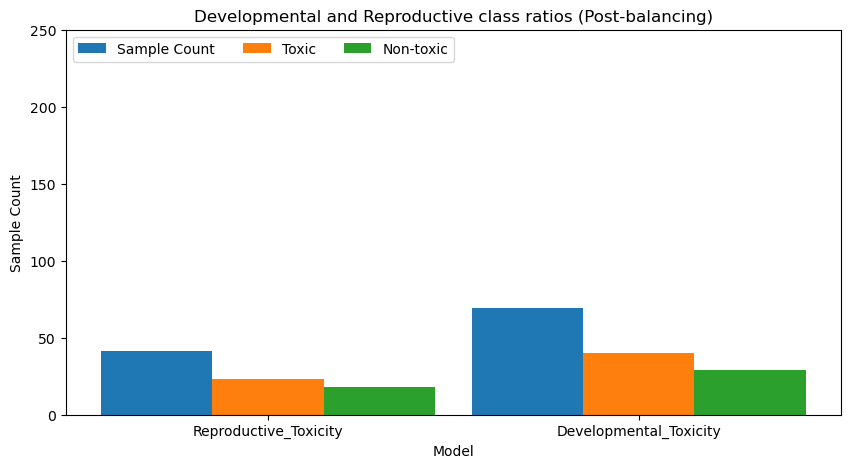

In [108]:
figsize = (10,5)
ylim = 250

x = np.arange(len(namelist))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

data = [totlist, poslist, neglist]
fig, ax = plt.subplots(figsize=(figsize))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=models[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Count')
ax.set_xlabel('Model')
ax.set_title('Developmental and Reproductive class ratios (Pre-balancing)')
ax.set_xticks(x + width, namelist)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ylim)

plt.show()

bposlist = []
bneglist = []
btotlist = []

for data in btoxvals:
    pos = 0
    neg = 0
    for item in data:
        if item == 1:
            pos +=1 
        else:
            neg += 1
    btotlist.append(pos + neg)
    bposlist.append(pos)
    bneglist.append(neg)

data = [btotlist, bposlist, bneglist]
multiplier = 0

fig, ax = plt.subplots(figsize=(figsize))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=models[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Count')
ax.set_xlabel('Model')
ax.set_title('Developmental and Reproductive class ratios (Post-balancing)')
ax.set_xticks(x + width, namelist)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ylim)

plt.show()

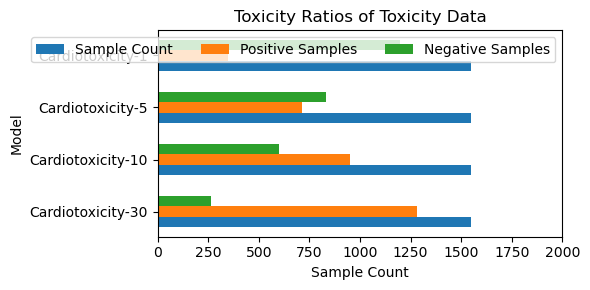

In [30]:
data = [totlist, poslist, neglist]
models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(namelist))  # the label locations
height = 0.2  # the height of the bars
multiplier = 0

# Create the figure with constrained height
fig, ax = plt.subplots(figsize=(6, 3))

# Create a horizontal grouped bar chart
for measurement in data:
    offset = height * multiplier
    rects = ax.barh(x + offset, measurement, height=height, label=models[multiplier])
    multiplier += 1

# Add some text for labels, title, and custom y-axis tick labels, etc.
ax.set_xlabel('Sample Count')
ax.set_ylabel('Model')
ax.set_title('Toxicity Ratios of Toxicity Data')
ax.set_yticks(x + height, namelist)  # Set y-ticks correctly
ax.legend(loc='upper right', ncols=3)
ax.set_xlim(0, 2000)  # Adjust based on your data limits



plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()

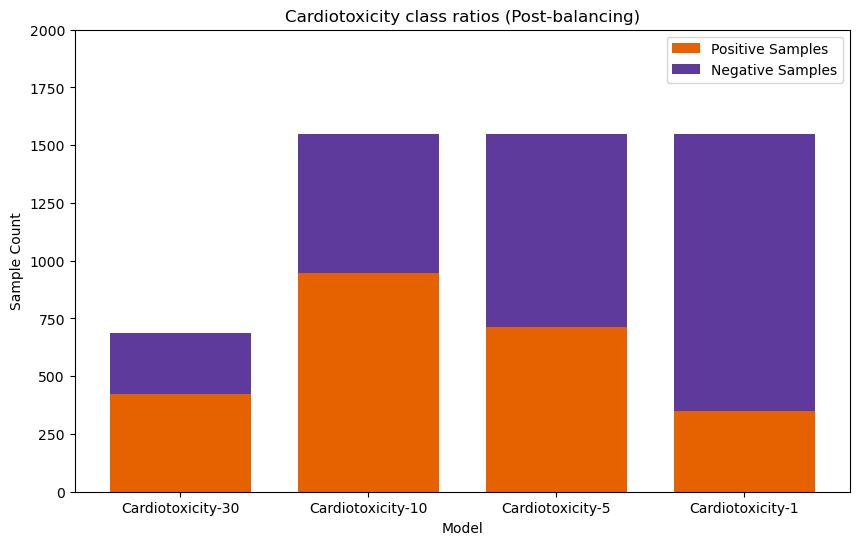

In [77]:
data = [btotlist, bposlist, bneglist]

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(namelist))  # the label locations
width = 0.75  # the width of the bars
multiplier = 0
plt.figure(figsize=(10, 6))
plt.bar(namelist, bposlist, color='#E66100', width = width)
plt.bar(namelist, bneglist, bottom=bposlist, color='#5D3A9B', width = width)

plt.ylabel('Sample Count')
plt.xlabel('Model')
plt.title('Cardiotoxicity class ratios (Post-balancing)')
plt.xticks(x, namelist)
plt.legend(models[1:])
plt.ylim(0, 2000)

plt.show()

<Figure size 2000x600 with 0 Axes>

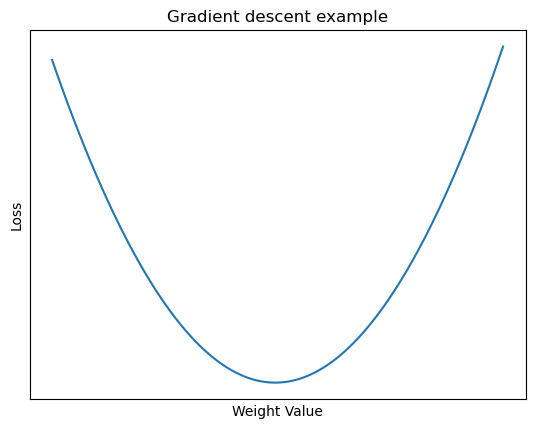

In [115]:
import matplotlib.pyplot as plt

a=[]
b=[]
# y=0
# x=-50
plt.figure(figsize=(20, 6))
for x in range(-50,50,1):
    y=x**2+2*x+2
    a.append(x)
    b.append(y)
    #x= x+1

fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(a,b)

plt.xticks([])  

plt.yticks([])  
plt.ylabel('Loss')
plt.xlabel('Weight Value')
plt.title('Gradient descent example')
plt.show()
